# AirBnB Project for  **Project: Write A Data Science Blog Post**

### 0.1  Key Steps for Project

Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.
   I chose the AirBnnB dataset.  Because why not..

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:
        Gather necessary data to answer your questions
        Handle categorical and missing data
        Provide insight into the methods you chose and why you chose them

    Analyze, Model, and Visualize
        Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

    Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

## 0.2 [Rubric](https://review.udacity.com/#!/rubrics/1507/view)

#### Code Functionality and Readability
* Code is readable (uses good coding practices - PEP8) 
* Code is functional.
* Write code that is well documented and uses functions and classes as necessary.

#### Data
* Project follows the CRISP-DM Process while analyzing their data.
* Proper handling of categorical and missing values in the dataset.
* Categorical variables are handled appropriately for machine learning models (if models are created). 

#### Analysis, Modeling, Visualization
* There are 3-5 business questions answered.
	
#### Github Repository
* Student must publish their code in a public Github repository.
	
#### Blog Post
* Communicate their findings with stakeholders.
* There should be an intriguing title and image related to the project.
* The body of the post has paragraphs that are broken up by appropriate white space and images.
* Each question has a clearly communicated solution.

##  0.3  CRISP-DM
### 0.3.1 Business Understanding/Data Understanding
          AirBnB is an online marketplace for vacation/temporary houseing rentals.  Thier members/hosts own the property and rent via the  AirBnB marketplace.
          
          The data provides was provided each from Seattle and Bostom
          * listing.csv
          * calendar.csv
          * reviews.csv
          
          How to best position your property to make the most revenue?
          1) Know your capacity?   Waht neighborhoods/property type sell better?
          2) What time of year is best to make your property availible to get the most money?
          3) What do you need in your profile to garuntee your property is reviewed and reviewed high
          
          
### 0.3.2 Data Preparation
        1) Calendar has all the pricing by day.  This will in one way or another be our y vaules for question 1 and 2
        2) 
        
        
     
#### 0.3.2.1 Cleaning Data
        * 
### 0.3.3 Modeling
### 0.3.4 Evaluation
### 0.3.5 Deployment

## 1.1 Header

In [251]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path as op
import ast
import math
import os
from datetime import date
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [252]:
PATH = os.getcwd()+"\All Data"
PATH

'C:\\Users\\tcanty\\Documents\\Udacity\\DSND_Term2\\project_files\\AirBnB\\All Data'

In [253]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'b_calendar.csv',
 'b_listings.csv',
 'b_reviews.csv',
 's_calendar.csv',
 's_listings.csv',
 's_reviews.csv']

In [254]:
def clean_listings(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes Datetime cols -> datetime format
    2) Fixes percentage strings to float
    3) Fixes bool strings to bool cols
    4) Fixes datatype of oject to categories were appropraite
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''

    ## Clean percentage strings to float values
    pct_col = ['host_acceptance_rate','host_response_rate']
    for pc in pct_col:
        df[pc] = df[pc].str.strip("%")
        df[pc] = df[pc].astype('float')
        df[pc] = df[pc].apply(lambda x: x/100)
        #df[pc] = df[pc].map('{:,.2%}'.format)
        
    ## Clean dollar strings to value

    dol_col = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        #df[dol] = df[dol].map('${:,.2f}'.format)
        
    ## Change type to category
    cat_col = ['host_response_time','host_location','host_neighbourhood','neighbourhood',
               'neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode',
              'market','smart_location','country_code','country','property_type','room_type',
              'calendar_updated','jurisdiction_names','cancellation_policy','bed_type']
    
    for cc in cat_col:
        df[cc] = df[cc].astype('category')
  

    ## Fix Boolean Columns
    bool_col = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
                'is_location_exact','has_availability','requires_license','instant_bookable',
               'require_guest_profile_picture','require_guest_phone_verification']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    ## Fix Datetime columns
    dt_col = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

    ## Fix list column
    ## The following code transforms column 'host_verification' to a usable matrix of 
    ##     one hot encoding the contained communicaiton methods
    
    
    df2 = pd.DataFrame(df['host_verifications'].apply(lambda x:ast.literal_eval(x)))  # string to list #
    df3 = df2.host_verifications.apply(pd.Series)                                   # list -> series across columns #
    df2 = df2.merge(df3, right_index=True, left_index=True)
    df2 = df2.reset_index().melt(id_vars=['id','host_verifications'],value_name = 'host_sm_ver')
    df2 = df2.pivot_table(values='variable',columns='host_sm_ver',index='id',aggfunc='count',fill_value=0)
    df2 = df2.add_prefix('hv_')
    df = df.merge(df2,left_index=True, right_index=True)

    
    
    df4 = pd.DataFrame(df_listing['amenities'].apply(lambda x:
                           x.replace('\"','').replace('{','').replace('}','').split(',')))
    df5 = df4.iloc[:,0].apply(pd.Series)
    df4 = df4.merge(df5,left_index=True,right_index=True)
    df4 = df4.reset_index().melt(id_vars=['id','amenities'],value_name = 'amms')
    df4 = df4.pivot_table(values='variable',columns='amms',index='id',aggfunc='count',fill_value=0)
    df4 = df4.add_prefix('amm_')
    df = df.merge(df4,left_index=True, right_index=True)
    
    ## Creates new data columns indicating whether this data is contained in the 
    
    
    str_cols = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
   'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about']
    
    def replace_str(x):
        if type(x) == float:
            if  math.isnan(x):
                return False
        else: return True
    
    
    df_listed_attributes = pd.DataFrame()
    for col in str_cols:
        df_listed_attributes[col] = df[col].apply(lambda x: replace_str(x))
        df_listed_attributes[col] = df_listed_attributes[col].astype('bool')
    
    df_listed_attributes = df_listed_attributes.add_prefix('attr_')
    df = df.merge(df_listed_attributes,left_index=True,right_index=True)
    df = df.drop(columns=str_cols)
    ## Drop Columns
    '''Reasons
    All N/A: licence
    No N/A: listing_url
    onehot: host_verifications
    am
    
    
    '''
    drop_cols = ['license','host_verifications','amenities'] 
    df = df.drop(columns=drop_cols)
    return df


In [255]:
def clean_cal(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes Datetime cols -> datetime format
    2) Fixes percentage strings to float
    3) Fixes bool strings to bool cols
    4) Fixes datatype of oject to categories were appropraite
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''
    dol_col= ['price']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        
    ## Fix Datetime columns
    dt_col = ['date']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

    ## Fix Bool Columns

    bool_col = ['available']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    return df

In [256]:
df_listing = pd.read_csv(PATH+'\s_listings.csv',index_col=0)

In [257]:
df_cal = pd.read_csv(PATH+'\s_calendar.csv',index_col=0)

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [258]:
df_listing = clean_listings(df_listing)

In [259]:
df_cal = clean_cal(df_cal)

In [260]:
df_cal['week_num'] = df_cal['date'].apply(lambda x: date.isocalendar(x)[1])

In [261]:
df_cal['month'] = df_cal['date'].apply(lambda x: x.month)

In [262]:
df_cal['year'] = df_cal['date'].apply(lambda x: x.year)

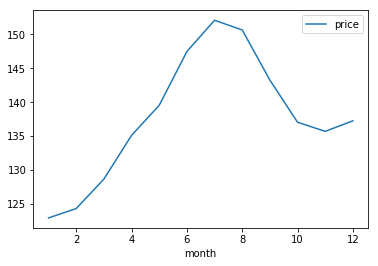

In [263]:
pd.DataFrame(df_cal.groupby(['month'])['price'].mean()).plot()

import matplotlib.pyplot as plt

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


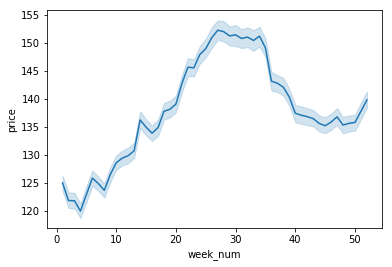

In [264]:
ax1 = sns.lineplot(x=df_cal['week_num'],y=df_cal['price'])

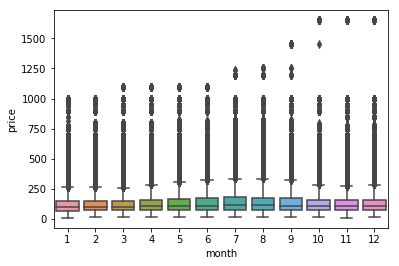

In [265]:
ax1 = sns.boxplot(y=df_cal['price'],x=df_cal['month'],)

In [266]:
df_avg_price = pd.DataFrame(df_cal.groupby(by=['listing_id'])['price'].mean())

In [267]:
df_data = df_avg_price.merge(df_listing,left_index=True,right_index=True)

In [268]:
diff = df_data['price_x']-df_data['price_y']
diff.mean()

8.777437597440422

In [269]:
df_data = df_data.dropna(axis=0,subset=['price_x'])

In [270]:
df_data.select_dtypes(include='int64').iloc[:,50:60].head()

,amm_Iron,amm_Kitchen,amm_Laptop Friendly Workspace,amm_Lock on Bedroom Door,amm_Other pet(s),amm_Pets Allowed,amm_Pets live on this property,amm_Pool,amm_Safety Card,amm_Shampoo
3335,0,1,0,0,1,0,1,0,0,0
4291,0,0,0,0,0,0,0,0,0,1
5682,1,1,1,0,0,0,0,0,0,1
6606,0,1,0,0,0,0,1,0,0,1
7369,1,1,1,0,0,0,0,0,0,1


In [271]:
df_data['neighbourhood'].nunique()

81

In [272]:
df_data['neighbourhood_cleansed'].nunique()

87

In [273]:
df_data['neighbourhood_group_cleansed'].nunique()

17

In [274]:
ammenities = list(df_data.filter(like='amm').columns.values)

In [275]:
physical_attr_loc = ['price_x','bathrooms','bedrooms','beds','neighbourhood','neighbourhood_cleansed',
                     'neighbourhood_group_cleansed','property_type','room_type','bed_type',
                    'accommodates','guests_included'] + ammenities

In [301]:
df_data_p = df_data[physical_attr_loc]

In [302]:
df_data_p['price_x'].isna().any()

False

In [303]:
df_data_p.shape

(3720, 54)

In [304]:
# dropping neighbourhood columns because there are significannt # of N/A and there are other comparable columns
df_data_p = df_data_p.drop(columns='neighbourhood')

In [305]:
# drop rows with N/A for bathroom  - not enough data to impute easily.
# Since it is a small number of rows and my analysis asks about choices made based on what is in the profile
# I am removing these since 
df_data_p = df_data_p.drop(index=df_data_p.loc[df_data_p['bathrooms'].isna(),:].index )

In [306]:
df_data_p = df_data_p.drop(index=df_data_p.loc[df_data_p['bedrooms'].isna(),:].index )

In [307]:
df_data_p = df_data_p.drop(index=df_data_p.loc[df_data_p['property_type'].isna(),:].index )

In [308]:
data_P_lmodel = LinearRegression()

In [309]:
cat_col = list(df_data_p.select_dtypes(include='category').columns.values)

In [310]:
df_data_p_d = df_data_p.merge(pd.get_dummies(df_data_p[cat_col],prefix_sep='::'),right_index=True, left_index=True,)

In [311]:
df_data_p_d = df_data_p_d.drop(columns=cat_col)

In [312]:
df_data_p__X = df_data_p_d.drop(columns='price_x')
df_data_p_y = df_data_p_d['price_x']

In [313]:
pX_train, pX_test, py_train, py_test = train_test_split(df_data_p_X,df_data_p_y,test_size = 0.3,random_state=72)

In [314]:
data_P_lmodel.fit(pX_train,py_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [315]:
py_predict = data_P_lmodel.predict(pX_test)

In [316]:
r2_score(py_predict,py_test)

-0.0018050541176690693

In [317]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = pX_train.columns
coefs_df['coefs'] = data_P_lmodel.coef_
coefs_df['abs_coefs'] = np.abs(data_P_lmodel.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df[0:30]

,est_int,coefs,abs_coefs
167,room_type::Entire home/apt,3.330029e+13,3.330029e+13
168,room_type::Private room,3.330029e+13,3.330029e+13
169,room_type::Shared room,3.330029e+13,3.330029e+13
146,neighbourhood_group_cleansed::Queen Anne,5.495220e+12,5.495220e+12
153,property_type::Boat,5.299218e+12,5.299218e+12
156,property_type::Camper/RV,5.299218e+12,5.299218e+12
166,property_type::Yurt,5.299218e+12,5.299218e+12
154,property_type::Bungalow,5.299218e+12,5.299218e+12
161,property_type::Loft,5.299218e+12,5.299218e+12
155,property_type::Cabin,5.299218e+12,5.299218e+12


In [318]:
coefs_df.loc[167,'est_int'].split('::')[0]

'room_type'

In [319]:
coefs_df.insert(1,'type','')

In [320]:
coefs_df['type']=coefs_df['est_int'].apply(lambda x: x.split('::')[0])

In [321]:
coefs_df.groupby(by='type')['abs_coefs'].mean().sort_values(ascending=False)

type
room_type                         3.330029e+13
property_type                     4.968017e+12
bed_type                          2.871300e+12
neighbourhood_group_cleansed      1.876874e+12
neighbourhood_cleansed            1.707334e+12
amm_Doorman                       3.636924e+01
bathrooms                         3.436740e+01
bedrooms                          3.040063e+01
amm_                              2.062300e+01
amm_Air Conditioning              1.793293e+01
amm_Hot Tub                       1.370115e+01
amm_Wireless Internet             1.074056e+01
accommodates                      1.067336e+01
amm_Dog(s)                        1.006526e+01
amm_Elevator in Building          9.884049e+00
amm_Hangers                       9.008522e+00
amm_Smoking Allowed               8.049467e+00
amm_Cable TV                      6.750079e+00
amm_Suitable for Events           6.619329e+00
amm_Essentials                    5.976565e+00
amm_Pool                          5.845247e+00
amm_Wash

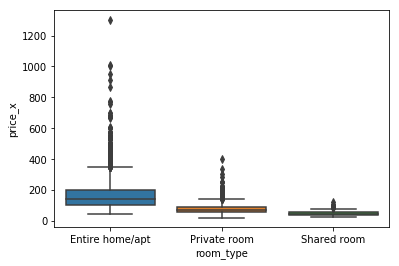

In [335]:
ax1 = sns.boxplot(x=df_data_p['room_type'],y=df_data_p['price_x'])

In [338]:
prop_type = list(df_data_p['property_type'].unique())

[Text(0, 0, 'House'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'Condominium'),
 Text(0, 0, 'Bed & Breakfast'),
 Text(0, 0, 'Cabin'),
 Text(0, 0, 'Townhouse'),
 Text(0, 0, 'Loft'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Chalet'),
 Text(0, 0, 'Camper/RV'),
 Text(0, 0, 'Boat'),
 Text(0, 0, 'Treehouse'),
 Text(0, 0, 'Dorm'),
 Text(0, 0, 'Tent'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Yurt')]

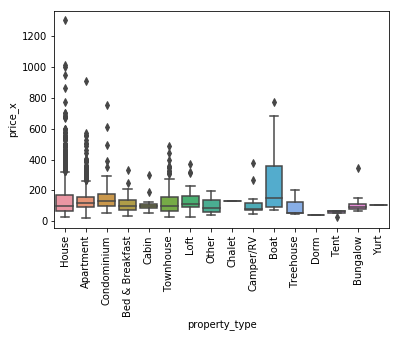

In [346]:
ax2 = sns.boxplot(x=df_data_p['property_type'],y=df_data_p['price_x'],order=prop_type)
ax2.set_xticklabels(labels=prop_type,rotation=90)

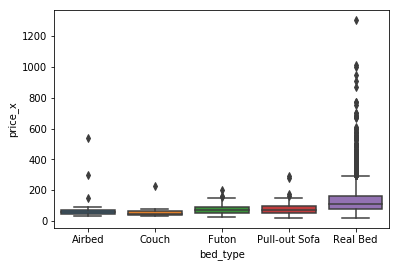

In [326]:
sns.boxplot(x=df_data_p['bed_type'],y=df_data_p['price_x'])

[Text(0, 0, 'Other neighborhoods'),
 Text(0, 0, 'Delridge'),
 Text(0, 0, 'Capitol Hill'),
 Text(0, 0, 'Downtown'),
 Text(0, 0, 'West Seattle'),
 Text(0, 0, 'Northgate'),
 Text(0, 0, 'Ballard'),
 Text(0, 0, 'Beacon Hill'),
 Text(0, 0, 'Cascade'),
 Text(0, 0, 'Seward Park'),
 Text(0, 0, 'Central Area'),
 Text(0, 0, 'Queen Anne'),
 Text(0, 0, 'Lake City'),
 Text(0, 0, 'Rainier Valley'),
 Text(0, 0, 'Magnolia'),
 Text(0, 0, 'University District'),
 Text(0, 0, 'Interbay')]

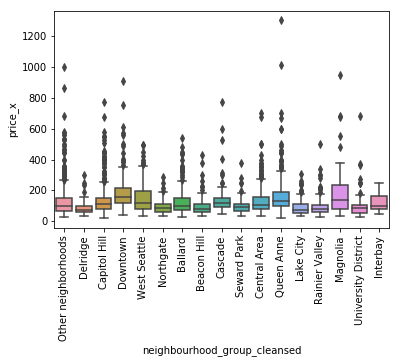

In [348]:
n_label = list(df_data_p['neighbourhood_group_cleansed'].unique())
ax4 = sns.boxplot(x=df_data_p['neighbourhood_group_cleansed'],y=df_data_p['price_x'],order=n_label)
ax4.set_xticklabels(labels=n_label,rotation=90)